In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
from functools import reduce

In [12]:
sns.set()
plt.rcParams['figure.figsize'] = (15, 10)

In [13]:
input_dirs = ['data/Equity_MidCap/']
input_files = []
for input_dir in input_dirs:
    input_files.extend([os.path.join(input_dir, file) for file in os.listdir(input_dir) if file.endswith('.csv')])

In [14]:
input_files

['data/Equity_MidCap/AxisMidCap.csv',
 'data/Equity_MidCap/EdelweissMidCap.csv',
 'data/Equity_MidCap/InvescoMidCap.csv',
 'data/Equity_MidCap/KotakMidCap.csv',
 'data/Equity_MidCap/NIFTY MIDCAP 150_Data_2013-22.csv',
 'data/Equity_MidCap/NIFTY MIDCAP 50_Data_2013-22.csv',
 'data/Equity_MidCap/NIFTY MIDCAP150 QUALITY 50_Data_2013-22.csv',
 'data/Equity_MidCap/NipponMidCap.csv',
 'data/Equity_MidCap/PGIMMidCap.csv',
 'data/Equity_MidCap/QuantMidCap.csv']

In [15]:
amfi_files = [file for file in input_files if 'NIFTY' not in file]
nifty_indices_files = [file for file in input_files if 'NIFTY' in file]

mf_names = ['AxisMidcap', 'EdelweissMidcap', 'InvescoMidCap', 'KotakMidCap', 'NipponMidCap', 'PGIMMidCap', 'QuantMidCap']
index_names = ['NiftyMidcap150', 'NiftyMidcap50', 'NiftyMidcap150Quality50']
fund_names = mf_names + index_names

In [16]:
def read_fund_data(file_name, fund_name, date_col_name, nav_col_name, skiprows=0):
    df = pd.read_csv(file_name, skiprows=skiprows)
    df = df[[date_col_name, nav_col_name]]
    df[date_col_name] = pd.to_datetime(df[date_col_name], infer_datetime_format=True)
    df.columns = ['date', f'{fund_name}_NAV']
    df.sort_values(by='date', inplace=True)
    df.dropna(inplace=True)
    return df

In [17]:
file_name = 'data/Equity_MidCap/AxisMidCap.csv'
fund_name = 'AxisMidCap'
date_col_name = 'NAV date'
nav_col_name = 'Net Asset Value'
df = read_fund_data(file_name, fund_name, date_col_name, nav_col_name, skiprows=4)

In [18]:
file_name = 'data/Equity_MidCap/NIFTY MIDCAP 150_Data_2013-22.csv'
fund_name = 'NiftyMidcap150'
date_col_name = 'Date'
nav_col_name = 'Close'
df = read_fund_data(file_name, fund_name, date_col_name, nav_col_name, skiprows=0)

In [19]:
mf_df_list = []

# Read MF files
for file_name, fund_name in zip(amfi_files, mf_names):
    date_col_name = 'NAV date'
    nav_col_name = 'Net Asset Value'
    mf_df_list.append(read_fund_data(file_name, fund_name, date_col_name, nav_col_name, skiprows=4))
    
for file_name, fund_name in zip(nifty_indices_files, index_names):
    date_col_name = 'Date'
    nav_col_name = 'Close'
    mf_df_list.append(read_fund_data(file_name, fund_name, date_col_name, nav_col_name, skiprows=0))

In [20]:
funds_df_daily = (reduce(lambda x, y: pd.merge(x, y, on = 'date', how='outer'), mf_df_list)
            .sort_values(by='date')
            .drop_duplicates(subset=['date']))
funds_df_daily.set_index('date', inplace=True)

In [21]:
funds_df_daily.head()

,AxisMidcap_NAV,EdelweissMidcap_NAV,InvescoMidCap_NAV,KotakMidCap_NAV,NipponMidCap_NAV,PGIMMidCap_NAV,QuantMidCap_NAV,NiftyMidcap150_NAV,NiftyMidcap50_NAV,NiftyMidcap150Quality50_NAV
date,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,2409.5,3588.80
2013-01-02,13.77,NaN,17.71,NaN,507.1617,NaN,NaN,2713.0,2424.9,3602.30
2013-01-03,13.79,NaN,17.75,14.052,508.5350,NaN,NaN,2729.8,2439.1,3615.92
2013-01-04,13.91,NaN,17.85,14.177,510.0272,NaN,NaN,2740.8,2446.4,3624.10
2013-01-07,13.92,NaN,17.90,14.199,509.5146,NaN,30.6076,2740.8,2456.1,3636.90


In [23]:
funds_df_monthly = funds_df_daily.resample('M').first()

In [25]:
funds_df_monthly.head()

,AxisMidcap_NAV,EdelweissMidcap_NAV,InvescoMidCap_NAV,KotakMidCap_NAV,NipponMidCap_NAV,PGIMMidCap_NAV,QuantMidCap_NAV,NiftyMidcap150_NAV,NiftyMidcap50_NAV,NiftyMidcap150Quality50_NAV
date,,,,,,,,,,
2013-01-31,13.77,NaN,17.71,14.052,507.1617,NaN,30.6076,2700.0,2409.5,3588.80
2013-02-28,13.47,NaN,17.30,13.620,496.2864,NaN,30.7201,2622.3,2315.8,3461.87
2013-03-31,12.52,NaN,16.13,12.453,453.8110,NaN,30.8771,2429.4,2043.4,3299.77
2013-04-30,12.33,NaN,15.89,12.089,444.1416,NaN,31.0550,2394.8,1964.2,3291.06
2013-05-31,12.78,NaN,16.31,12.328,457.9950,NaN,31.3834,2458.5,2123.2,3385.59


In [26]:
def calculate_rolling_rets(df, num_years, num_data_points_per_year):
    
    for fund_name in fund_names:
        for num_year in num_years:
            df[f'{fund_name}_{num_year}Y_rolling_ret'] = df[f'{fund_name}_NAV'].pct_change(periods=num_data_points_per_year * num_year)
            df[f'{fund_name}_{num_year}Y_rolling_ret'] = ((df[f'{fund_name}_{num_year}Y_rolling_ret'] + 1) ** (1/num_year)) - 1
            
    return df

In [27]:
num_years = [1,3,5]
num_data_points_per_year = 250
funds_df_daily_w_rolling_rets = calculate_rolling_rets(funds_df_daily, num_years, num_data_points_per_year)

In [28]:
funds_df_daily_w_rolling_rets.head()

,AxisMidcap_NAV,EdelweissMidcap_NAV,InvescoMidCap_NAV,KotakMidCap_NAV,NipponMidCap_NAV,PGIMMidCap_NAV,QuantMidCap_NAV,NiftyMidcap150_NAV,NiftyMidcap50_NAV,NiftyMidcap150Quality50_NAV,...,QuantMidCap_5Y_rolling_ret,NiftyMidcap150_1Y_rolling_ret,NiftyMidcap150_3Y_rolling_ret,NiftyMidcap150_5Y_rolling_ret,NiftyMidcap50_1Y_rolling_ret,NiftyMidcap50_3Y_rolling_ret,NiftyMidcap50_5Y_rolling_ret,NiftyMidcap150Quality50_1Y_rolling_ret,NiftyMidcap150Quality50_3Y_rolling_ret,NiftyMidcap150Quality50_5Y_rolling_ret
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,2409.5,3588.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,13.77,NaN,17.71,NaN,507.1617,NaN,NaN,2713.0,2424.9,3602.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,13.79,NaN,17.75,14.052,508.5350,NaN,NaN,2729.8,2439.1,3615.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,13.91,NaN,17.85,14.177,510.0272,NaN,NaN,2740.8,2446.4,3624.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,13.92,NaN,17.90,14.199,509.5146,NaN,30.6076,2740.8,2456.1,3636.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
num_years = [1,3,5]
num_data_points_per_year = 12
funds_df_monthly_w_rolling_rets = calculate_rolling_rets(funds_df_monthly, num_years, num_data_points_per_year)

In [30]:
funds_df_monthly_w_rolling_rets.head()

,AxisMidcap_NAV,EdelweissMidcap_NAV,InvescoMidCap_NAV,KotakMidCap_NAV,NipponMidCap_NAV,PGIMMidCap_NAV,QuantMidCap_NAV,NiftyMidcap150_NAV,NiftyMidcap50_NAV,NiftyMidcap150Quality50_NAV,...,QuantMidCap_5Y_rolling_ret,NiftyMidcap150_1Y_rolling_ret,NiftyMidcap150_3Y_rolling_ret,NiftyMidcap150_5Y_rolling_ret,NiftyMidcap50_1Y_rolling_ret,NiftyMidcap50_3Y_rolling_ret,NiftyMidcap50_5Y_rolling_ret,NiftyMidcap150Quality50_1Y_rolling_ret,NiftyMidcap150Quality50_3Y_rolling_ret,NiftyMidcap150Quality50_5Y_rolling_ret
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,13.77,NaN,17.71,14.052,507.1617,NaN,30.6076,2700.0,2409.5,3588.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,13.47,NaN,17.30,13.620,496.2864,NaN,30.7201,2622.3,2315.8,3461.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,12.52,NaN,16.13,12.453,453.8110,NaN,30.8771,2429.4,2043.4,3299.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,12.33,NaN,15.89,12.089,444.1416,NaN,31.0550,2394.8,1964.2,3291.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,12.78,NaN,16.31,12.328,457.9950,NaN,31.3834,2458.5,2123.2,3385.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


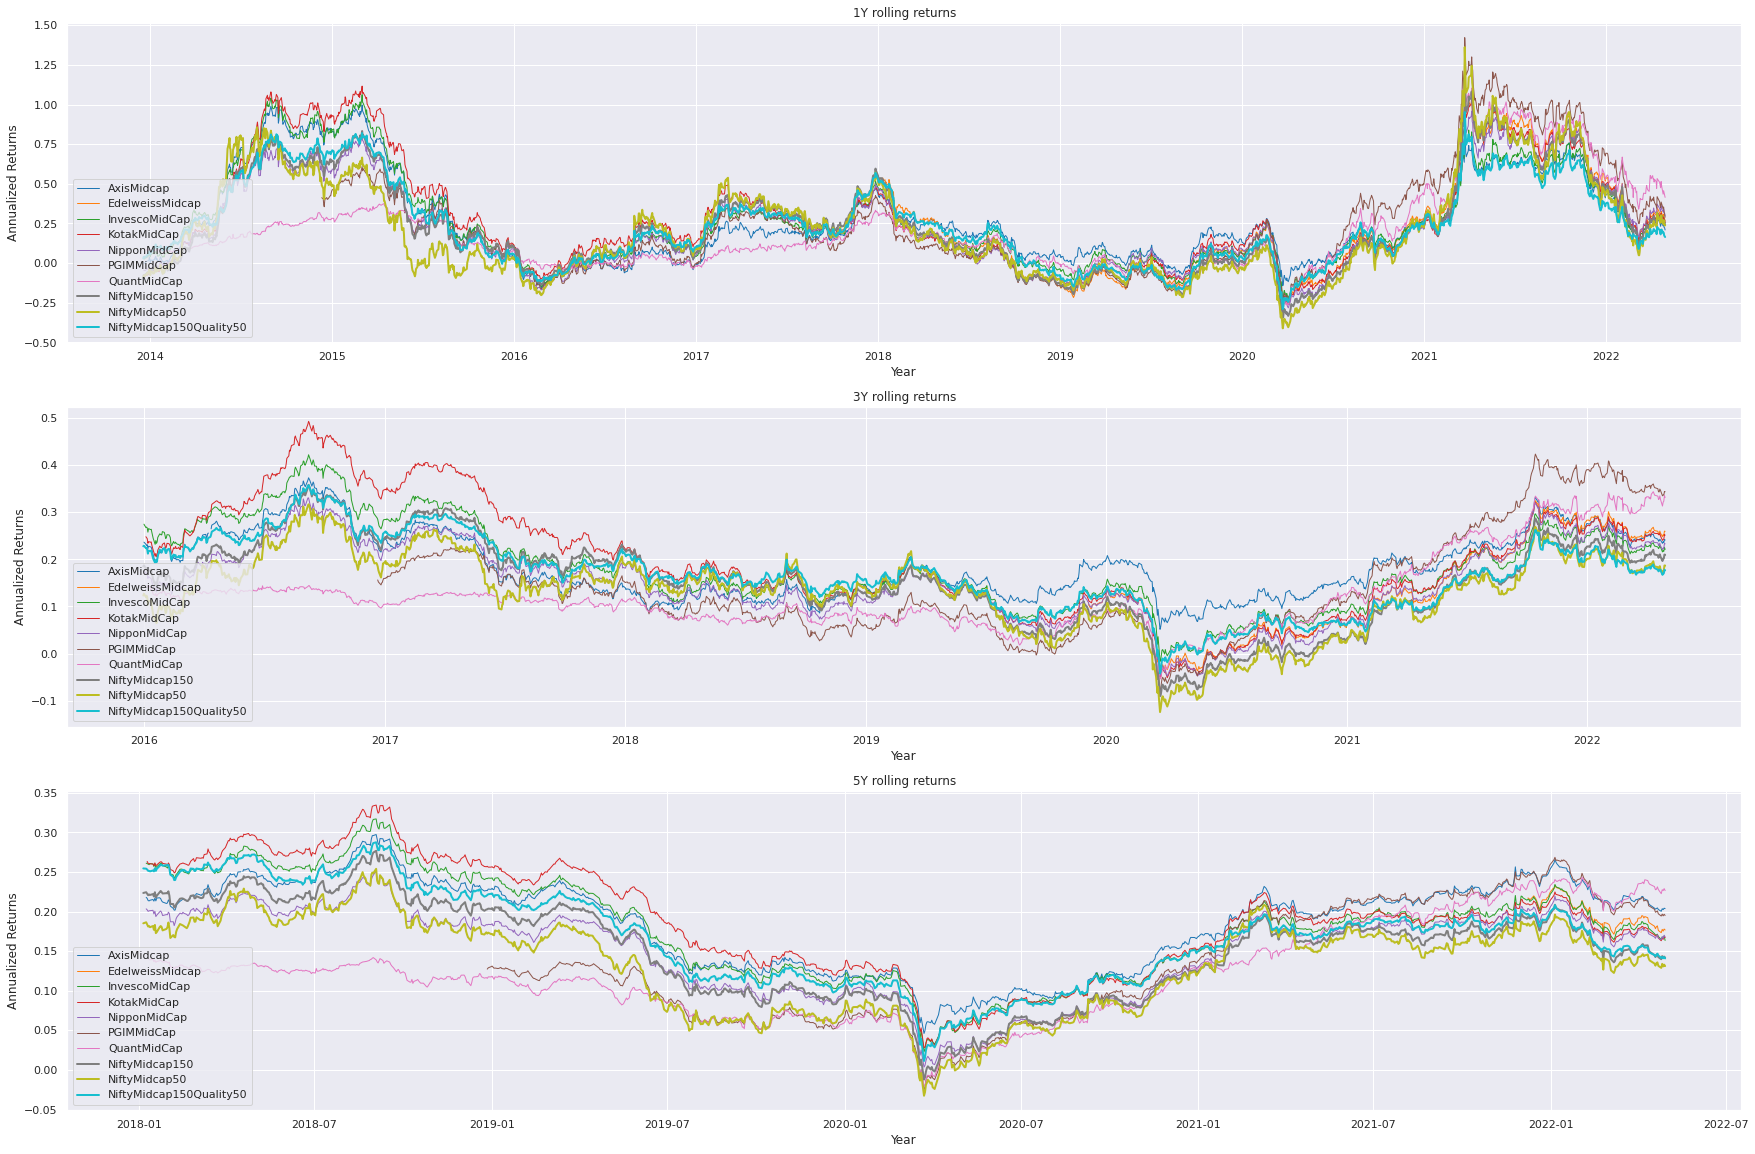

In [32]:
num_years = [1,3,5]
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

colors = pl.cm.tab10(np.linspace(0,1,len(fund_names)))

for i , num_year in enumerate(num_years): 
    for j, fund_name in enumerate(fund_names):
        line_width = 1
        if fund_name in index_names:
            line_width = 2
        ax[i].plot(funds_df_daily.index, funds_df_daily[f'{fund_name}_{num_year}Y_rolling_ret'], color=colors[j],linewidth=line_width)
        ax[i].set_title(f'{num_year}Y rolling returns')
        ax[i].set_xlabel('Year')
        ax[i].set_ylabel('Annualized Returns')
        ax[i].legend(fund_names, loc='lower left')
plt.savefig('plots/MidCapFundsComparison.png', dpi=300)

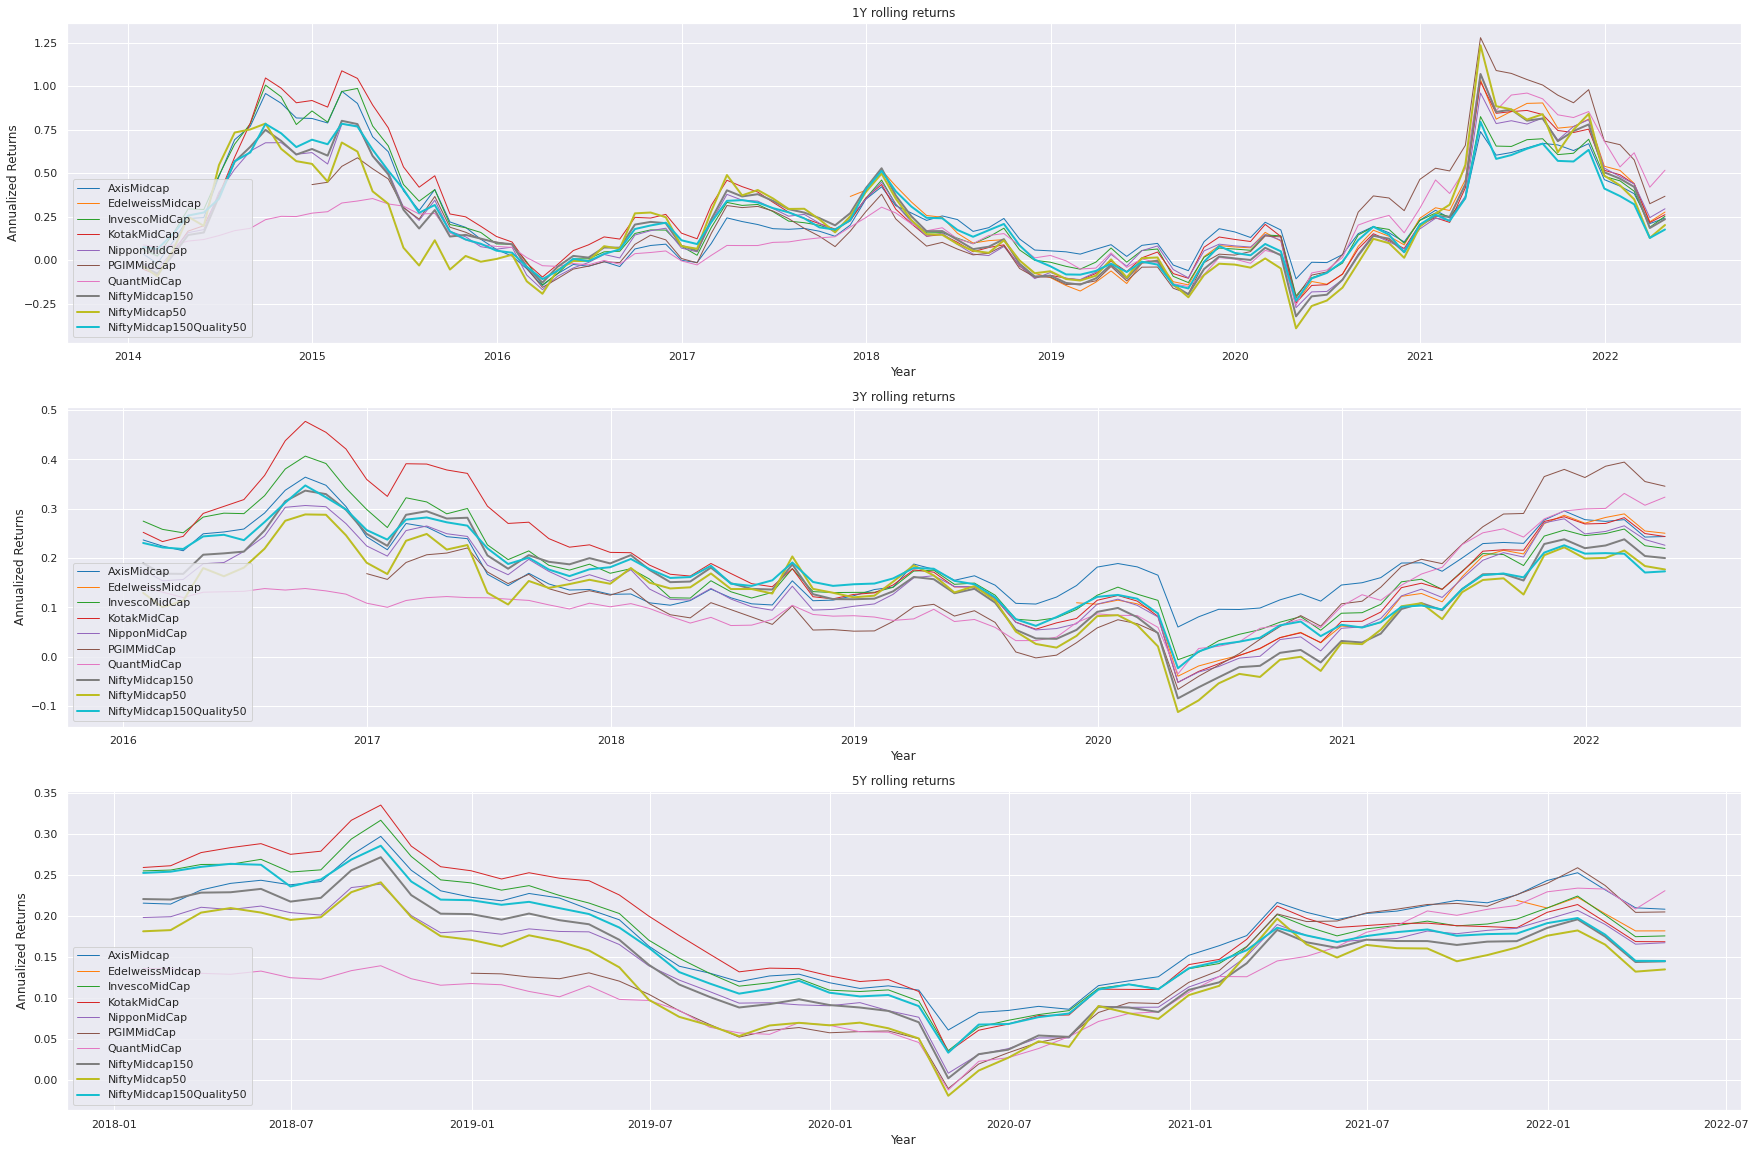

In [33]:
num_years = [1,3,5]
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

colors = pl.cm.tab10(np.linspace(0,1,len(fund_names)))

for i , num_year in enumerate(num_years): 
    for j, fund_name in enumerate(fund_names):
        line_width = 1
        if fund_name in index_names:
            line_width = 2
        ax[i].plot(funds_df_monthly_w_rolling_rets.index, funds_df_monthly_w_rolling_rets[f'{fund_name}_{num_year}Y_rolling_ret'], color=colors[j],linewidth=line_width)
        ax[i].set_title(f'{num_year}Y rolling returns')
        ax[i].set_xlabel('Year')
        ax[i].set_ylabel('Annualized Returns')
        ax[i].legend(fund_names, loc='lower left')
# plt.show()
plt.savefig('plots/MidCapFundsComparisonMonthly.png', dpi=300)